<a href="https://colab.research.google.com/github/Ugo980109/CNN/blob/main/Immagine_Mediche_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import delle Librerie necessarie

In [7]:
import tensorflow as tf

In [8]:
from tensorflow import keras
from tensorflow.keras.layers import InputLayer, Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

Caricamento dataset immagini mediche

In [9]:
from google.colab import drive
drive.mount('/content/drive')
import scipy.io as sio
Dataset=sio.loadmat('/content/drive/MyDrive/Progetto_CNN/Dataset_OrganAmnist.mat')

Mounted at /content/drive


Normalizzazione immegini

In [10]:
train_images=Dataset['train_images']
train_labels=Dataset['train_labels']
test_images=Dataset['test_images']
test_labels=Dataset['test_labels']
val_images=Dataset['val_images']
val_labels=Dataset['val_labels']
#Normalizzo le immagini
train_images=train_images.astype('float32')/255
test_images=test_images.astype('float32')/255
val_images=val_images.astype('float32')/255

Visualizzazione immagini

(28, 28)


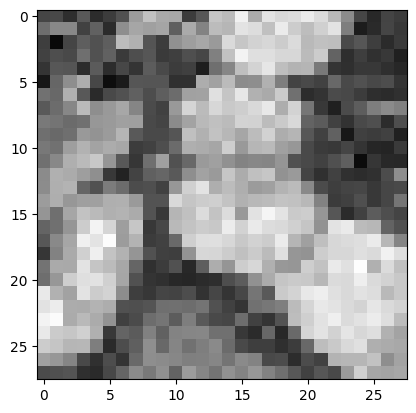

In [11]:
np.shape(train_images)
print(np.shape(train_images[55]))
plt.imshow(train_images[55,:,:],cmap='gray', vmin=0, vmax=1)
#plt.imshow(train_images[5,:,:]) foto a colori

array([9], dtype=uint8)

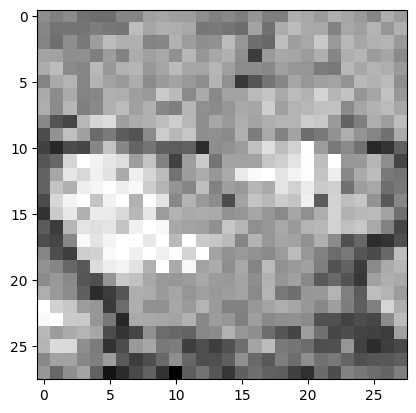

In [12]:
np.shape(test_images)
plt.imshow(test_images[55,:,:],cmap='gray', vmin=0, vmax=1)
test_labels[55]

In [13]:
train_images=tf.reshape(train_images,(-1,28,28,1))
test_images=tf.reshape(test_images,(-1,28,28,1))
val_images=tf.reshape(val_images,(-1,28,28,1))

Conversione labels in formato one-hot

In [14]:
train_labels=train_labels-1
test_labels=test_labels-1
val_labels=val_labels-1

train_labels = np.clip(train_labels, 0, 9)
test_labels = np.clip(test_labels, 0, 9)
val_labels = np.clip(val_labels, 0, 9)

num_classes=10
train_labels_one_hot=tf.keras.utils.to_categorical(train_labels,num_classes)
test_labels_one_hot=tf.keras.utils.to_categorical(test_labels,num_classes)
val_labels_one_hot=tf.keras.utils.to_categorical(val_labels,num_classes)

Costruzione Rete Neurale Convolutiva

In [22]:
model=Sequential()
model.add(InputLayer(shape=(28,28,1)))

model.add(Conv2D(8, (3,3), padding='same', activation='relu', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(8, (3,3), padding='same', activation='relu',  data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16, (5,5), padding='same', activation='relu',  data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (5,5), padding='same', activation='relu',  data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 28, 28, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 14, 14, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 16)            │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 7, 7, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 3, 3, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 32)            │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 3, 3, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,298 (67.57 KB)

 Trainable params: 17,170 (67.07 KB)

 Non-trainable params: 128 (512.00 B)

In [16]:
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [17]:
history=model.fit(
    train_images,
    train_labels_one_hot,
    epochs=25,
    callbacks=[callback],
    batch_size=32,
    validation_data=(val_images, val_labels_one_hot)
)

Epoch 1/25
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.6070 - loss: 1.1839 - val_accuracy: 0.9507 - val_loss: 0.1713
Epoch 2/25
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - accuracy: 0.8631 - loss: 0.4067 - val_accuracy: 0.9596 - val_loss: 0.1271
Epoch 3/25
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 44s 30ms/step - accuracy: 0.9049 - loss: 0.2823 - val_accuracy: 0.9652 - val_loss: 0.1135
Epoch 4/25
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 37s 26ms/step - accuracy: 0.9217 - loss: 0.2286 - val_accuracy: 0.9606 - val_loss: 0.1427
Epoch 5/25
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.9388 - loss: 0.1836 - val_accuracy: 0.9636 - val_loss: 0.1181
Epoch 6/25
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.9450 - loss: 0.1629 - val_accuracy: 0.9652 - val_loss: 0.1308
Epoch 7/25
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.9480 - loss: 0.1552 - val_accuracy: 0.9559 - val_loss: 0.1496
Epoch 8/25
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9550 -

In [18]:
predictions=model.predict(test_images)

556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step


In [19]:
results=model.evaluate(test_images, test_labels_one_hot)

556/556 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8683 - loss: 0.4057


Vado a plottare l'accuratezza del mio modello

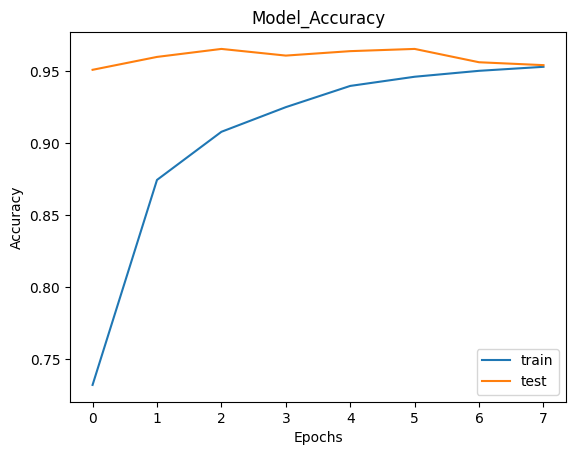

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc='best')

Vado a plottare la loss del mio modello

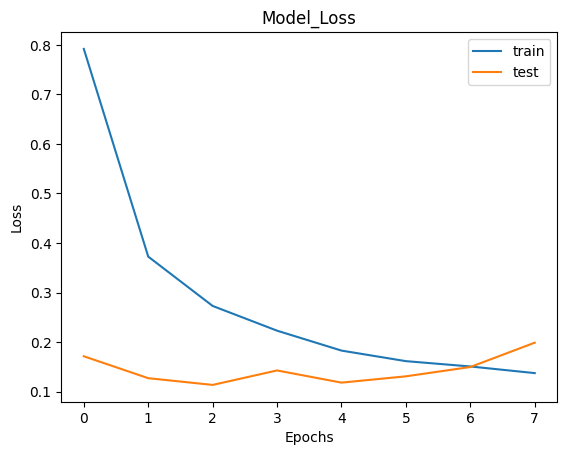

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'], loc='best')